*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-030202LineYerr/'
FileBaseName = '1Error-030202LineYerr'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
pandas     Ver. 2.2.3
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030202LineYerr/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030202LineYerr/


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

解析対象のデータをExcelファイルから読み込む

In [5]:
############################################
# Excelファイルからデータを読み込み、arrayに
# 変換する
#
df_Rdata = pd.read_excel(IpynbDir + FileBaseName + '-LSQMdata03.xlsx' )
#
x_i     = np.array( df_Rdata['x_length'    ] )
y_i     = np.array( df_Rdata['y_resistance'] )
sigma_i = np.array( df_Rdata['y_sigma'     ] )
#

データと解析結果を描く関数

In [6]:
############################################
def GrfLineWeight( Xdata, Ysets, x_mean, y_mean, label_x=r'$x$', label_y=r'$y$', title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( label_x )
  ax1.set_ylabel( label_y )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ysigma = Yset[1]
    Ylabel = Yset[2]
    Ymode  = Yset[3]
    Ycolor = Yset[4]
    #
    if Ysigma is not None:
        # plot / errorbar
        ax1.errorbar( Xdata, Ydata, yerr=Ysigma, color=Ycolor, fmt='o', markersize=10, capsize=5, label=Ylabel )
    else:
      if Ymode == 1:
        # plot / solid line
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
      elif  Ymode == 2:
        # plot / dashed
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
      elif  Ymode == 3:
        # plot / dotted
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
      else:
        # scatter
        ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # x_mean
  ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  #
  # y_mean
  ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

############################################
def GrfLine( Xdata, Ysets, x_mean, y_mean, title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ysigma = Yset[1]
    Ylabel = Yset[2]
    Ymode  = Yset[3]
    Ycolor = Yset[4]
    #
    if Ymode == 1:
      # plot / solid line
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # x_mean
  ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  #
  # y_mean
  ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

1.3.2

(2) 各$y_{m}$の誤差が異なる場合の直線回帰

各測定値の標準偏差$\sigma_{m}$の逆二乗を荷重として用いる
$$
w_{1}:\cdots:w_{M}=\frac{1}{\sigma_{1}^{2}}:\cdots:\frac{1}{\sigma_{M}^{2}},
W\equiv\sum^{M}w_{m}
$$

【直線は荷重平均の重心を通る】
$$
\overline{x}
=
\frac{1}{W}
\sum^{M}w_{m}\,x_{m},
\;\;\;\;
\overline{y}
=
\frac{1}{W}
\sum^{M}w_{m}\,y_{m},
$$

解析対象のデータのグラフを描画

荷重平均の重心座標 (+0.1542, +0.1905)


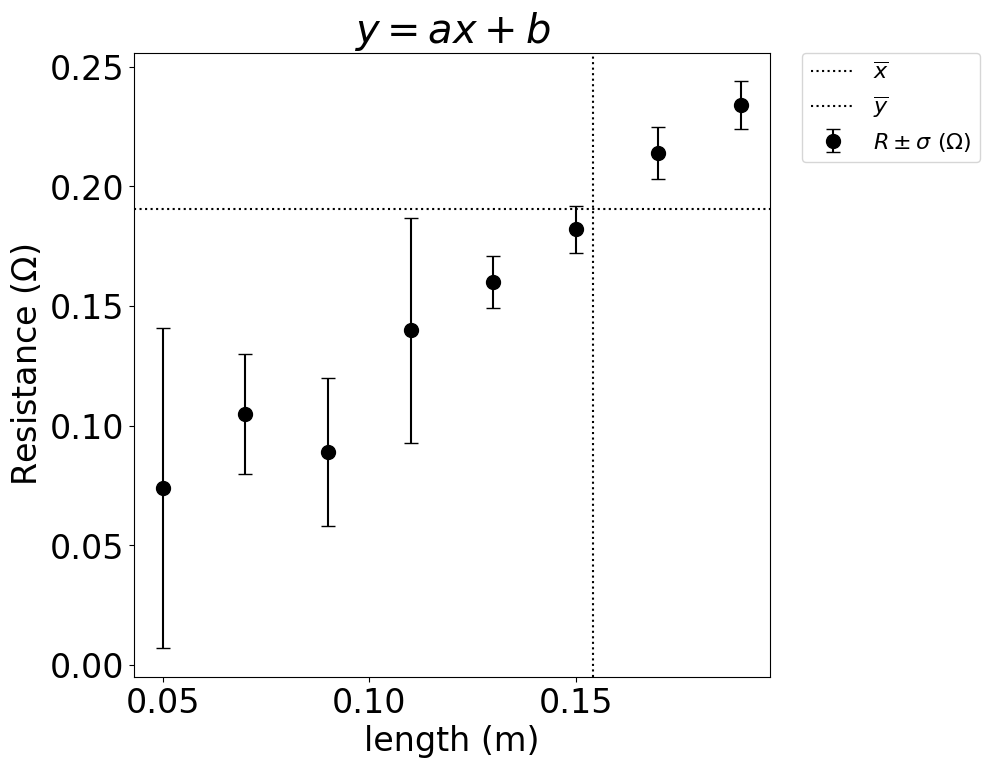

In [7]:
############################################
# 荷重
w_i = 1/(sigma_i**2)
#
# 荷重の和
W = np.sum( w_i )
#
# 荷重平均の重心座標
x_wmean = np.sum( w_i * x_i )/W
y_wmean = np.sum( w_i * y_i )/W
#
print( '荷重平均の重心座標 (%+.4f, %+.4f)' % (x_wmean, y_wmean) )
#
Rdatas = [ [ y_i, sigma_i, r'$R\pm\sigma~(\Omega)$', 0, 'black' ] ]
#
fig = GrfLineWeight( x_i, Rdatas, x_wmean, y_wmean, label_x=r'length (m)', label_y=r'Resistance ($\Omega$)', title=r'$y=ax+b$' )
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

解析に用いる荷重平均値
$$
\overline{x^{2}}
=
\frac{1}{W}
\sum^{M}w_{m}\,x_{m}^{2}
,
\quad
\overline{xy}
=
\frac{1}{W}
\sum^{M}w_{m}\,x_{m}y_{m},
$$

【傾き$a$、切片$b$の推定値】
$$
a
=
\frac{
\overline{xy}-\overline{x}\,\overline{y}
}{
\overline{x^{2}}-(\overline{x})^{2}
}
,
\quad
b=\frac{
\overline{x^{2}}\overline{y}-\overline{x}\overline{xy}
}{
\overline{x^{2}}-(\overline{x})^{2}
}
$$
解析結果のグラフを描画

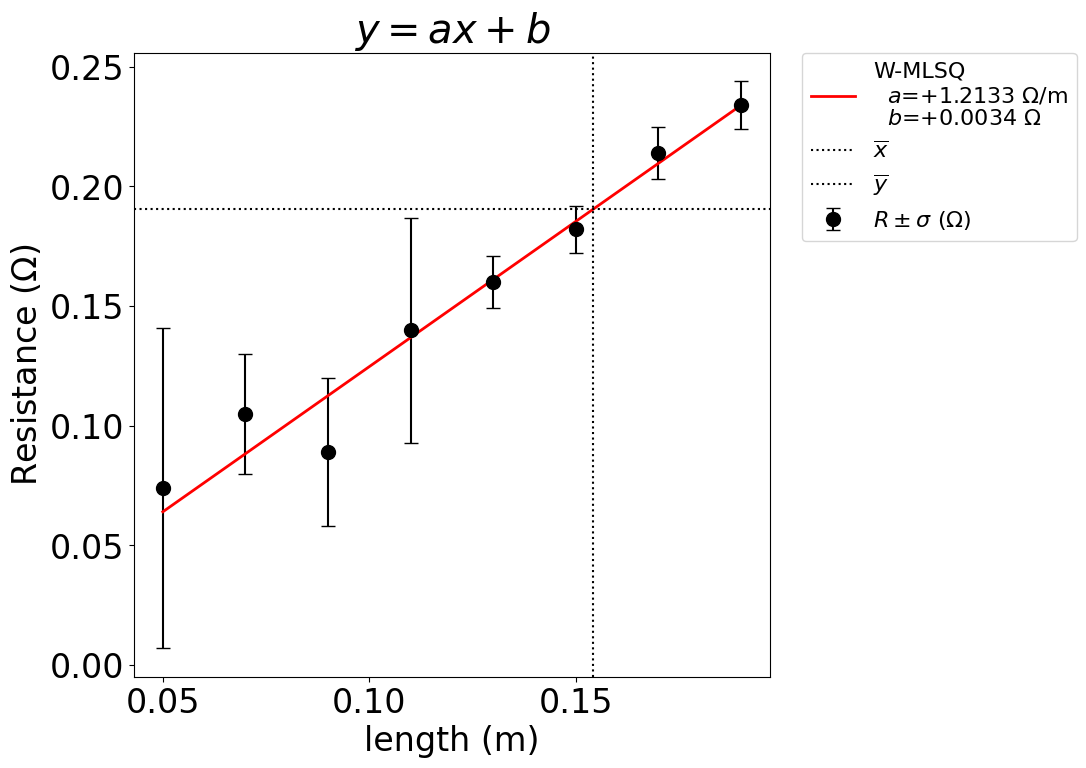

In [8]:
############################################
# 最小二乗法
############################################
# 荷重・最小二乗法
x2_wmean = np.sum( w_i * (x_i**2) ) / W
xy_wmean = np.sum( w_i * x_i * y_i )/ W
#
# 【傾きa、切片b の推定値】
a_w = ( xy_wmean - x_wmean * y_wmean )/( x2_wmean - x_wmean**2 )
b_w = y_wmean - a_w *  x_wmean
#
y_wmlsq_i = a_w * x_i + b_w
label_y_wmlsq = 'W-MLSQ\n  ' + (r'$a$=%+.4f $\Omega$/m' % a_w) + '\n  ' + (r'$b$=%+.4f $\Omega$' % b_w)
#
Rdatas = [ [ y_i,       sigma_i, r'$R\pm\sigma~(\Omega)$', 0, 'black' ],
           [ y_wmlsq_i, None,    label_y_wmlsq,            1, 'red'   ] ]
#
fig = GrfLineWeight( x_i, Rdatas, x_wmean, y_wmean, label_x=r'length (m)', label_y=r'Resistance ($\Omega$)', title=r'$y=ax+b$' )
#
fig.savefig( FilePath + FileBaseName + '-02.pdf' )

【傾き$a$の誤差】
$$
\sigma_{a}
=
\frac{1}{
  \sqrt{
    W
    \left[
      \overline{x^{2}}-(\overline{x})^{2}
    \right]
  }
}
$$

【切片$b$の誤差】
$$
\sigma_{b}
=
\sqrt{
  \frac{
  \overline{x^{2}}
  }{
    W
    \left[
      \overline{x^{2}}-(\overline{x})^{2}
    \right]
  }
}
$$

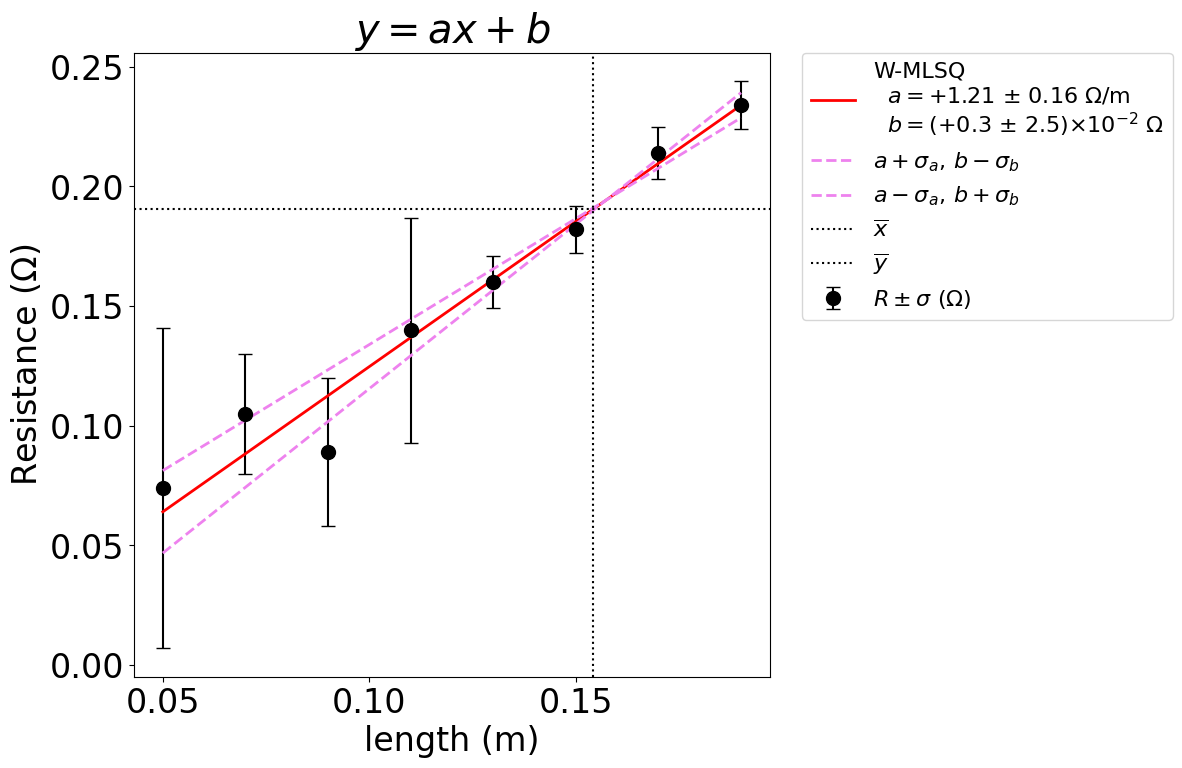

In [9]:
############################################
# 【傾きa の誤差】
sigma_a = 1 / np.sqrt( W * (x2_wmean - x_wmean**2) )
#
# 【切片b の誤差】
sigma_b = np.sqrt( x2_wmean / (W * (x2_wmean - x_wmean**2)) )
#
label_y_wmlsq = 'W-MLSQ\n  ' + r'$a=$' + \
              Format_MostProbableValue( a_w, sigma_a, r'$\Omega$/m', std_2digits=True, latex=True ) + \
              '\n  ' + r'$b=$' + \
              Format_MostProbableValue( b_w, sigma_b, r'$\Omega$',   std_2digits=True, latex=True )
#
y_wmlsq1_i = (a_w + sigma_a) * x_i + (b_w - sigma_b)
y_wmlsq2_i = (a_w - sigma_a) * x_i + (b_w + sigma_b)
#
Rdatas = [ [ y_i,        sigma_i, r'$R\pm\sigma~(\Omega)$',         0, 'black'  ],
           [ y_wmlsq_i,  None,    label_y_wmlsq,                    1, 'red'    ],
           [ y_wmlsq1_i, None,    r'$a+\sigma_{a},\,b-\sigma_{b}$', 2, 'violet' ],
           [ y_wmlsq2_i, None,    r'$a-\sigma_{a},\,b+\sigma_{b}$', 2, 'violet' ]
           ]
#
fig = GrfLineWeight( x_i, Rdatas, x_wmean, y_wmean, label_x=r'length (m)', label_y=r'Resistance ($\Omega$)', title=r'$y=ax+b$' )
#
fig.savefig( FilePath + FileBaseName + '-03.pdf' )